In [1]:
library(targets)
library(tidyverse)
library(Seurat)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [18]:
tar_meta() %>% filter(!is.na(error))

name,type,data,command,depend,seed,path,time,size,bytes,format,repository,iteration,parent,children,seconds,warnings,error
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<list>,<dttm>,<chr>,<int64>,<chr>,<chr>,<chr>,<lgl>,<list>,<dbl>,<chr>,<chr>
xe_obj_01_A1,stem,error,a5d0f8ccaf0876b3,97dd20f5ce85f59f,-13789762,NA,2024-03-09 22:53:02,de1c6d017cb4e8a8,38,qs,local,vector,NA,NA,18.528,Not validating FOV objects. Not validating Centroids objects. Not validating Centroids objects. Not validating FOV objects. Not validating Centroids objects. Not validating FOV objects. Not validating FOV objects. Not validating FOV objects. Not validating Seurat objects,object xe_feats not found
xe_obj_01_B1,stem,error,cd4154f625c01dd2,39cdc3bd2f9bc75e,922650803,NA,2024-03-09 22:53:01,de1c6d017cb4e8a8,38,qs,local,vector,NA,NA,18.749,Not validating FOV objects. Not validating Centroids objects. Not validating Centroids objects. Not validating FOV objects. Not validating Centroids objects. Not validating FOV objects. Not validating FOV objects. Not validating FOV objects. Not validating Seurat objects,object xe_feats not found
xe_obj_01_D1,stem,error,3b2c162469c0dfb9,f89f834444486e29,-1797868394,NA,2024-03-09 22:53:03,de1c6d017cb4e8a8,38,qs,local,vector,NA,NA,19.734,Not validating FOV objects. Not validating Centroids objects. Not validating Centroids objects. Not validating FOV objects. Not validating Centroids objects. Not validating FOV objects. Not validating FOV objects. Not validating FOV objects. Not validating Seurat objects,object xe_feats not found
xenium_genes_all_v02,stem,error,2614c9511e9de47c,7867edc1fd7fd9ec,-1132328068,NA,2024-03-10 02:16:28,de1c6d017cb4e8a8,38,qs,local,vector,NA,NA,0.004,NA,no slot of name meta.features for this object of class Assay5
obj_d5_other_01,stem,error,f44495359732734e,bf774c3099b36190,-544906220,NA,2024-03-10 21:43:50,de1c6d017cb4e8a8,38,qs,local,vector,NA,NA,2.416,NA,object xenium_features not found


In [2]:
source("../00_preprocessing/splitwrapper.R")
source(paste0("../00_preprocessing/preprocessing.R"))
source(paste0("../01_milo/milo.R"))
source(paste0("../01_milo/milo_plotting.R"))
source(paste0("../00_cellbender/cellbender_preprocess.R"))
source("../00_cellbender/process_seurat.R")
source('../01_milo_cellbender/milo_cellbender.R')
source("../code/resolve2xe/LoadResolveBaysor.R")
source("../01_resolve/resolve.R")
source("resolve_cellbender.R")

In [3]:
xe_class_features = c("Agrp", "Aqp4", "Bmp4", "Cfap299", "Cntn4", "Cntn5",
                   "Grm8", "Hs3st4", "Kcnip4", "Pdgfra", "Pdzrn3", "Plp1", 
                   "Pomc", "Rax", "Rbfox1", "Slc1a2", "Slc7a11", "Tenm2",
                   "Trpm3", "Zfp804b")

In [22]:
obj = qs::qread('_targets/objects/xe_obj_01')
obj

An object of class Seurat 
400 features across 38520 samples within 4 assays 
Active assay: Xenium (100 features, 99 variable features)
 3 layers present: counts, data, scale.data
 3 other assays present: BlankCodeword, ControlCodeword, ControlProbe
 2 dimensional reductions calculated: pca, umap
 8 spatial fields of view present: fov fov.2 fov.3 fov.4 fov.5 fov.6 fov.7 fov.8

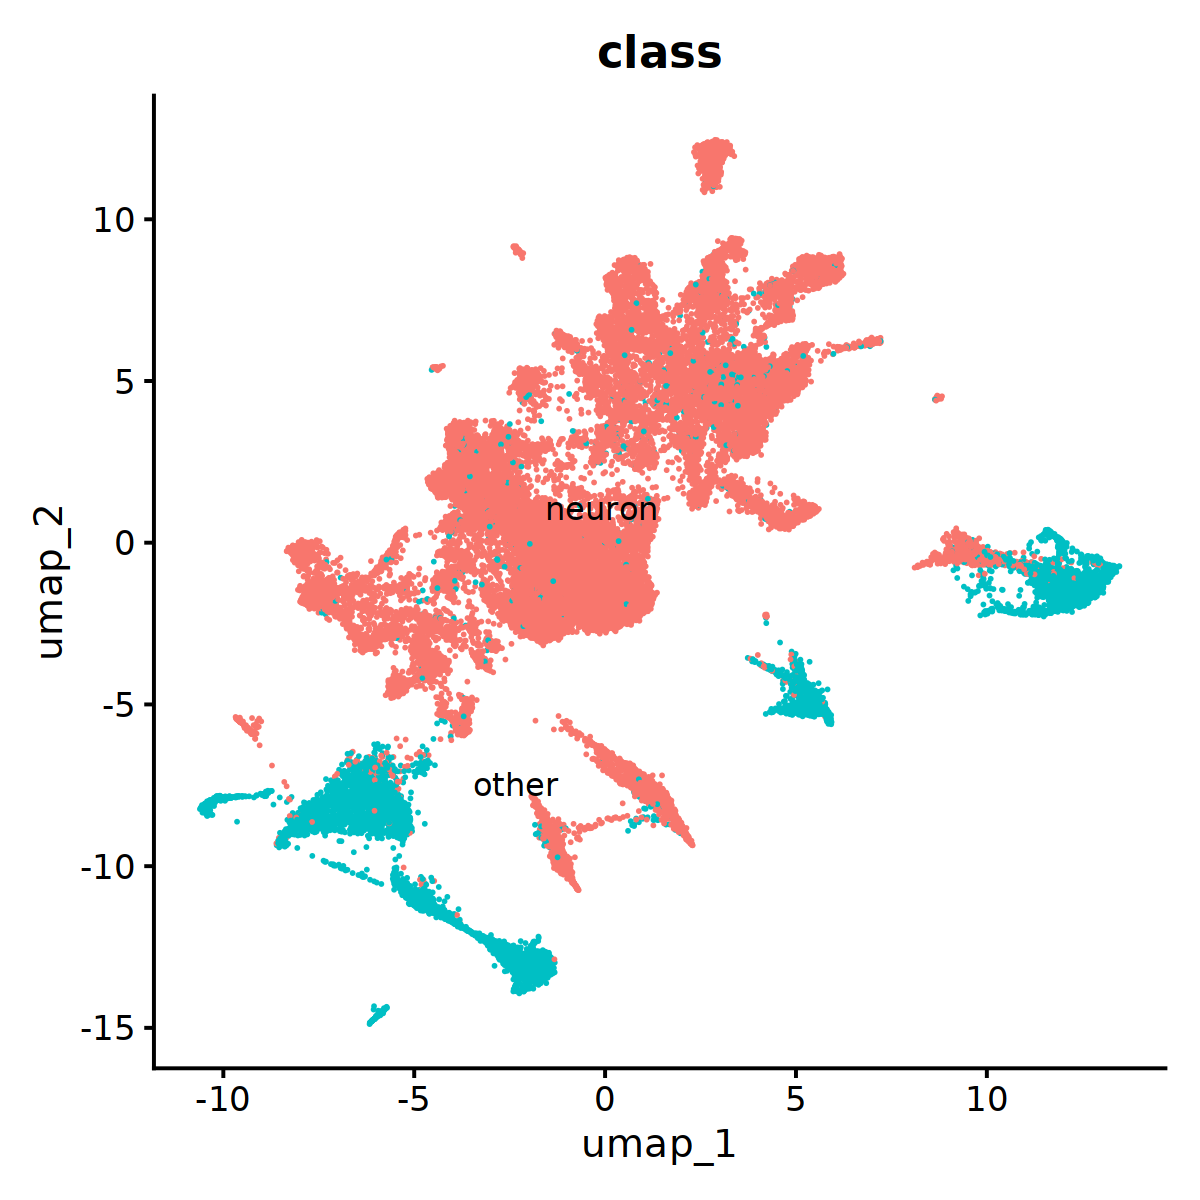

In [63]:
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res=200)
DimPlot(obj, group.by = 'class', label=TRUE) + NoLegend()

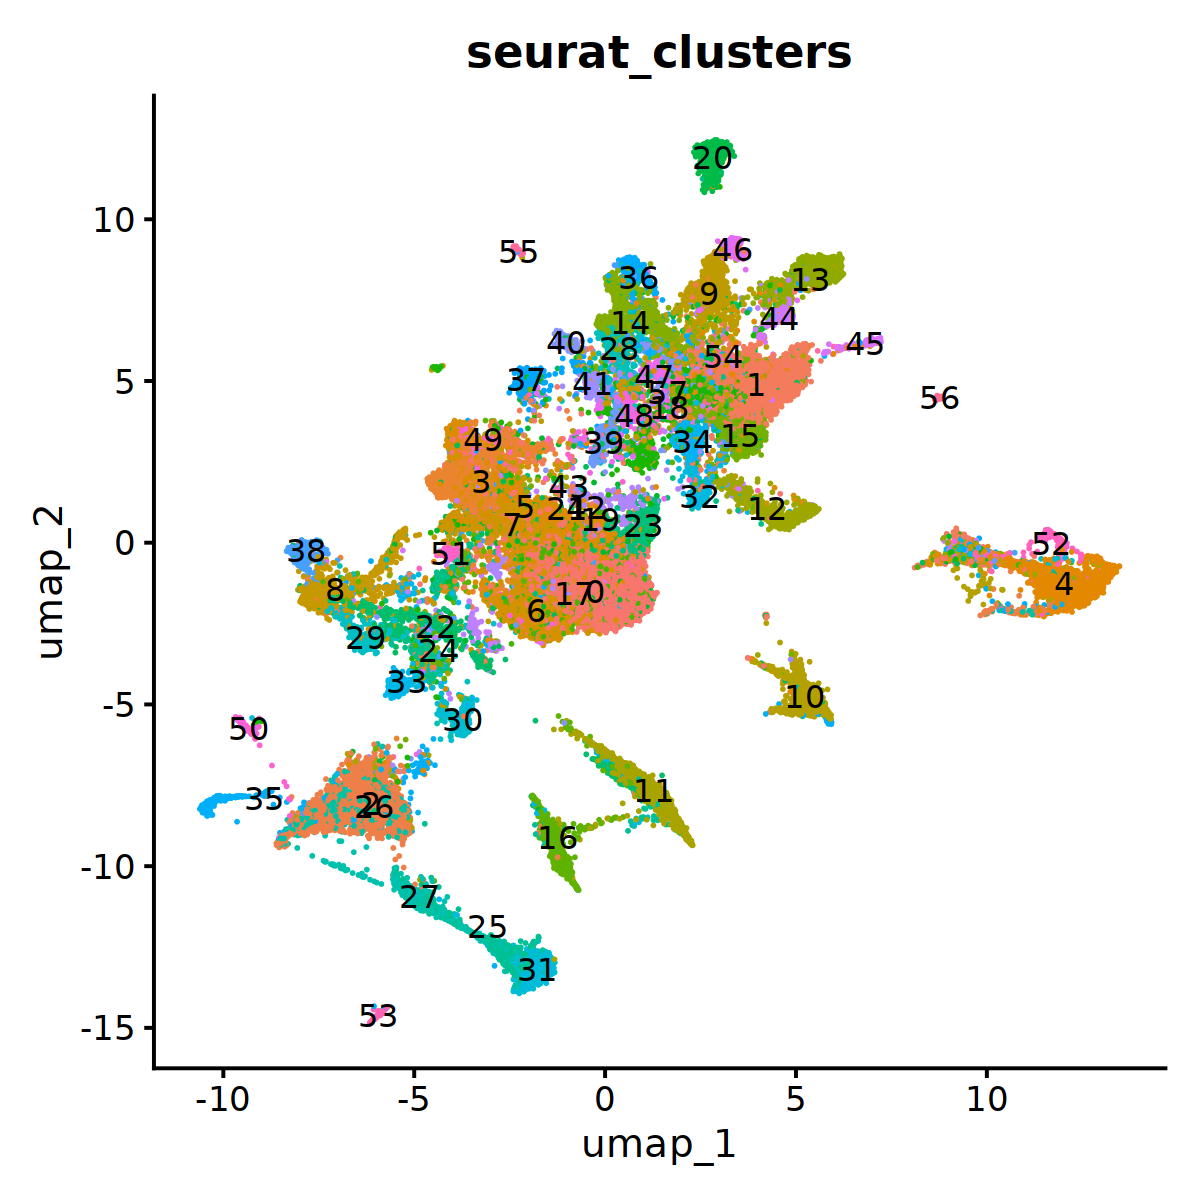

In [65]:
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res=200)
DimPlot(obj, group.by = 'seurat_clusters', label=TRUE) + NoLegend()

In [5]:
obj_fgf1 = qs::qread('_targets/objects/obj_d5_neuron')
obj_fgf1

An object of class Seurat 
27653 features across 39574 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [17]:
xenium_genes = qs::qread('_targets/objects/xenium_genes')
xenium_genes %>% length

[1] 99

In [6]:
selected_cells = obj %>% `[[` %>% filter(class == 'neuron') %>% rownames
obj = obj %>% subset(cells = selected_cells)

Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating

In [12]:
xenium_genes = get_xe_genes_v02(obj %>% set_default_assay('Xenium'), obj_fgf1 %>% set_default_assay('RNA'))

xenium_genes

[1] "Sorcs1"   "Lingo2"   "Cntn4"    "Tenm2"    "Sox5"     "Ptprd"   
 [7] "Robo1"    "Plcl1"    "Oxr1"     "Plxdc2"   "Plp1"     "Kirrel3" 
[13] "Mgat4c"   "Tenm3"    "Slit2"    "Hdac9"    "Col25a1"  "Ncam2"   
[19] "Rbfox1"   "Fgf13"    "Pde10a"   "Deptor"   "Alcam"    "Grm7"    
[25] "Agrp"     "Naaladl2" "Ntm"      "Gpc5"     "Hs3st4"   "Lef1"    
[31] "Erbb4"    "Kctd16"   "Zfhx3"    "Nrg1"     "Gpc6"     "Pcdh11x" 
[37] "Kcnip4"   "Brinp3"   "Cadm2"    "Pde4b"    "Fhit"     "Rgs6"    
[43] "Prkg1"    "Ptprk"    "Luzp2"    "Ptprt"    "Nxph1"    "Kcnq3"   
[49] "Lrmda"    "Dcc"      "Cntn5"    "Adarb2"   "Gabrg3"   "Rmst"    
[55] "Lrp1b"    "Trpm3"    "P3h2"     "Prr16"    "Prkca"    "Nrxn3"   
[61] "Inpp4b"   "Sgcz"     "Fat3"     "Plcb1"    "Cacna2d3" "Tox"     
[67] "Car10"    "Nkain2"   "Galntl6"  "Pcdh9"    "Slc1a2"   "Pdzrn3"  
[73] "Pomc"     "Zfp804b"  "Pcdh7"    "Grm8"     "Rtl4"     "Il1rapl2"
[79] "Sgcd"     "Egfem1"   "Arhgap6"  "Cfap299"  "Htr3b"    "Csmd1"

In [19]:
xenium_genes %>% length

[1] 99

In [20]:
DefaultAssay(obj_fgf1)

[1] "integrated"

In [23]:
obj

An object of class Seurat 
400 features across 38520 samples within 4 assays 
Active assay: Xenium (100 features, 99 variable features)
 3 layers present: counts, data, scale.data
 3 other assays present: BlankCodeword, ControlCodeword, ControlProbe
 2 dimensional reductions calculated: pca, umap
 8 spatial fields of view present: fov fov.2 fov.3 fov.4 fov.5 fov.6 fov.7 fov.8

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 20184 rows containing non-finite values (`stat_density()`).”


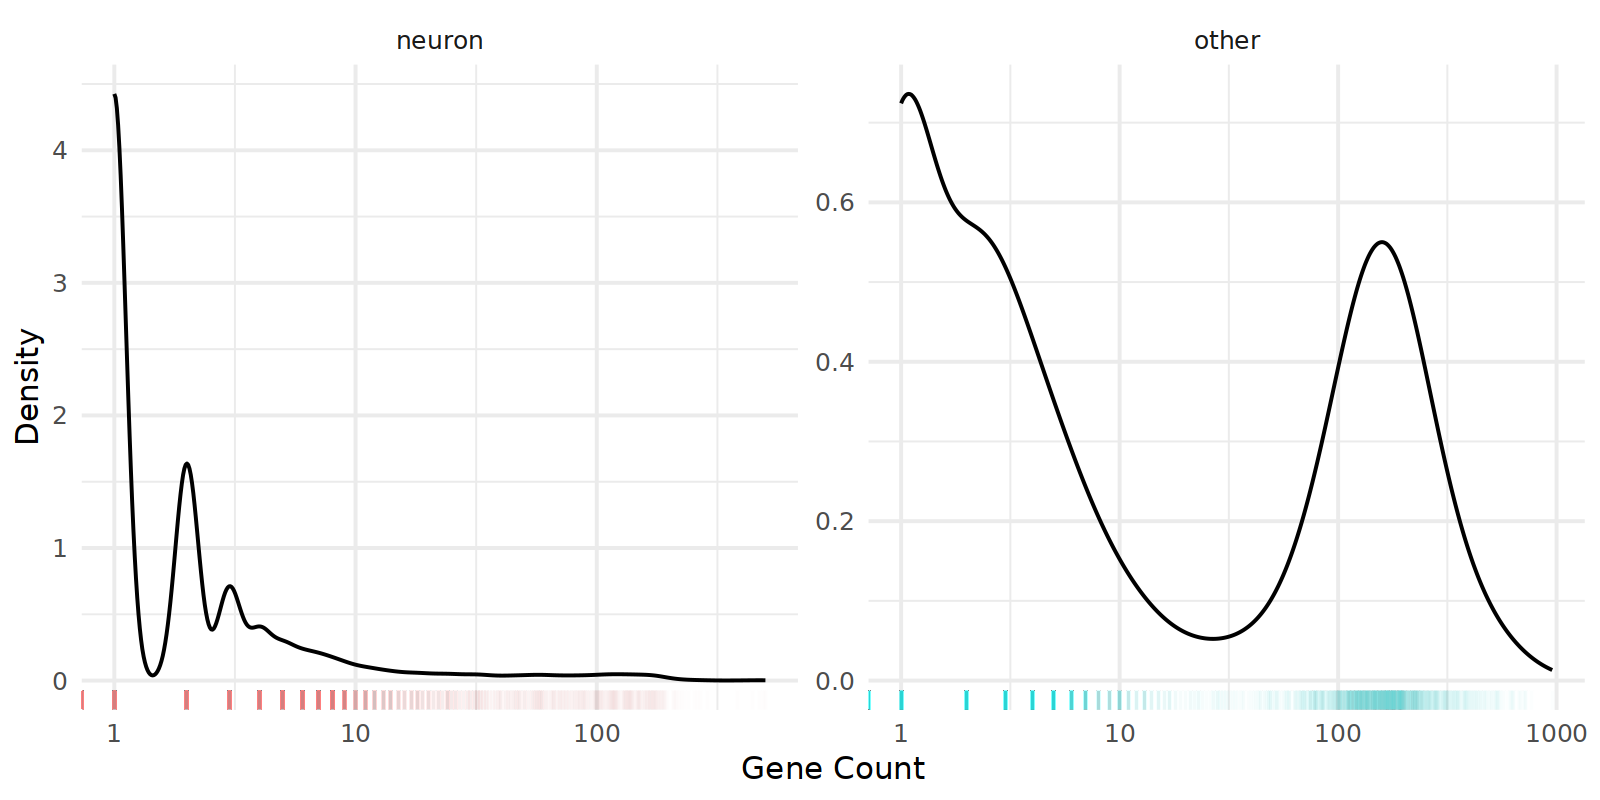

In [111]:
options(repr.plot.width=8, repr.plot.height=4)

library(ggplot2)
library(dplyr)

# Assuming obj is your data and it has been processed correctly
df = obj %>%
  `[[`() %>%
  mutate(gene_count = obj[["Xenium"]]$counts['Plp1', ])

ggplot(df, aes(x = gene_count)) +
  geom_density(alpha = 0.6) +  # Existing density layer
  geom_rug(aes(color = class), sides = "b", alpha=0.01) +  # Adding a rug to indicate the distribution of points
  facet_wrap(~ class, scales = "free") +
  scale_x_log10() +
  theme_minimal() +
  labs(x = "Gene Count", y = "Density") +
  scale_fill_viridis_d() +  # Adjust as needed
  theme(legend.position = "bottom") + NoLegend()


[1] 79

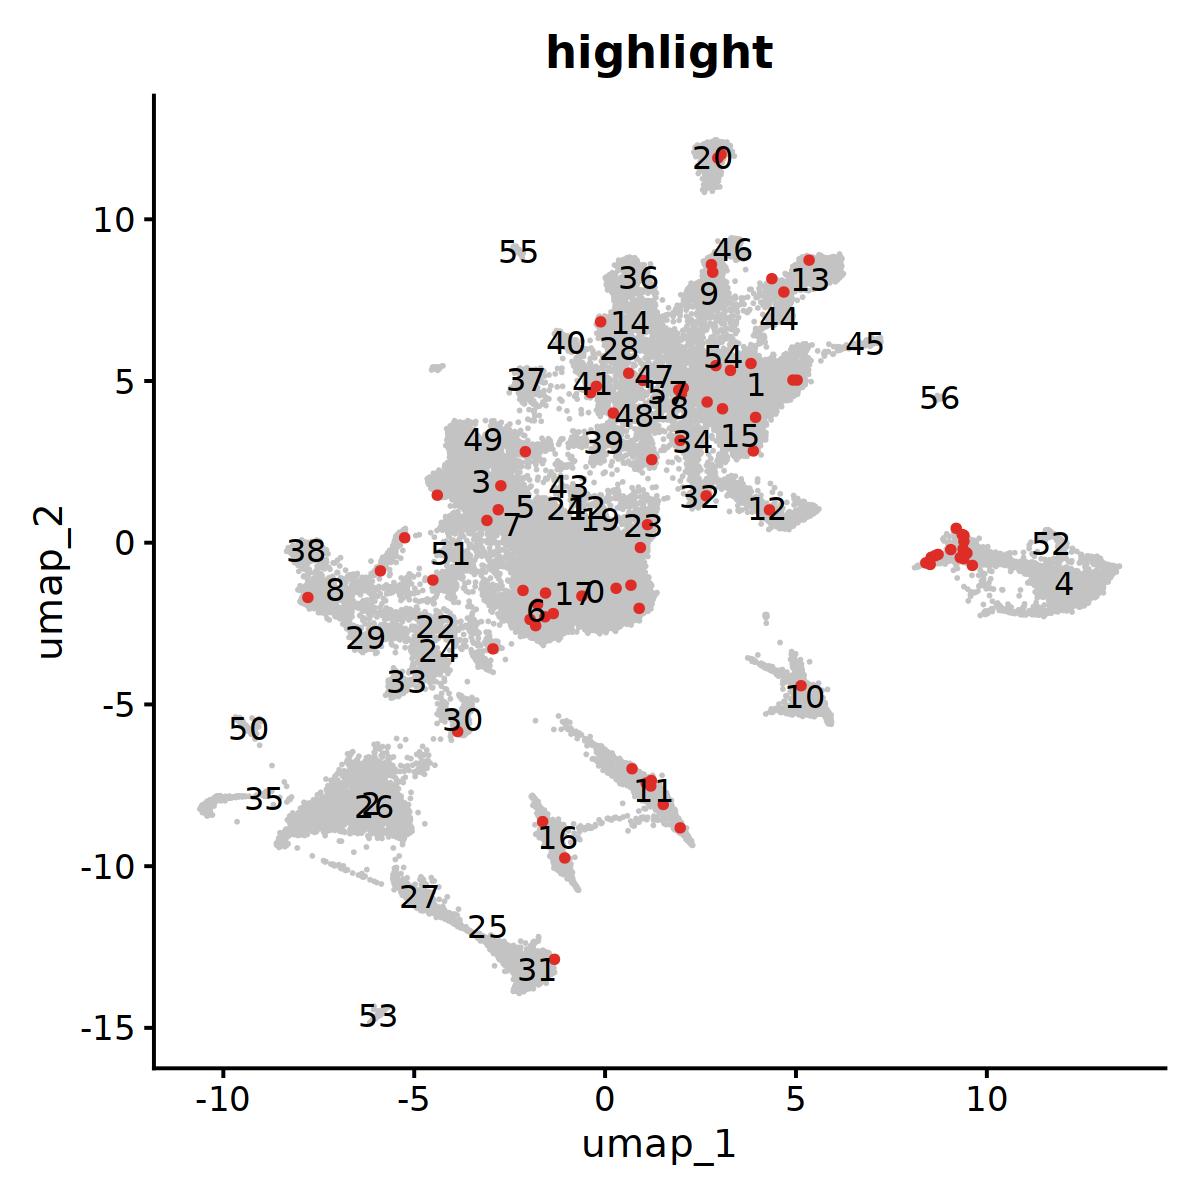

In [139]:
selected_cells = df %>%
filter(gene_count > 15) %>% 
filter(gene_count < 20) %>%
filter(class == 'neuron') %>%
rownames

selected_cells %>% length


options(repr.plot.width=6, repr.plot.height=6, repr.plot.res=200)
DimPlot(obj, group.by = 'seurat_clusters', label=TRUE, cells.highlight = selected_cells) + NoLegend()

[1] 592

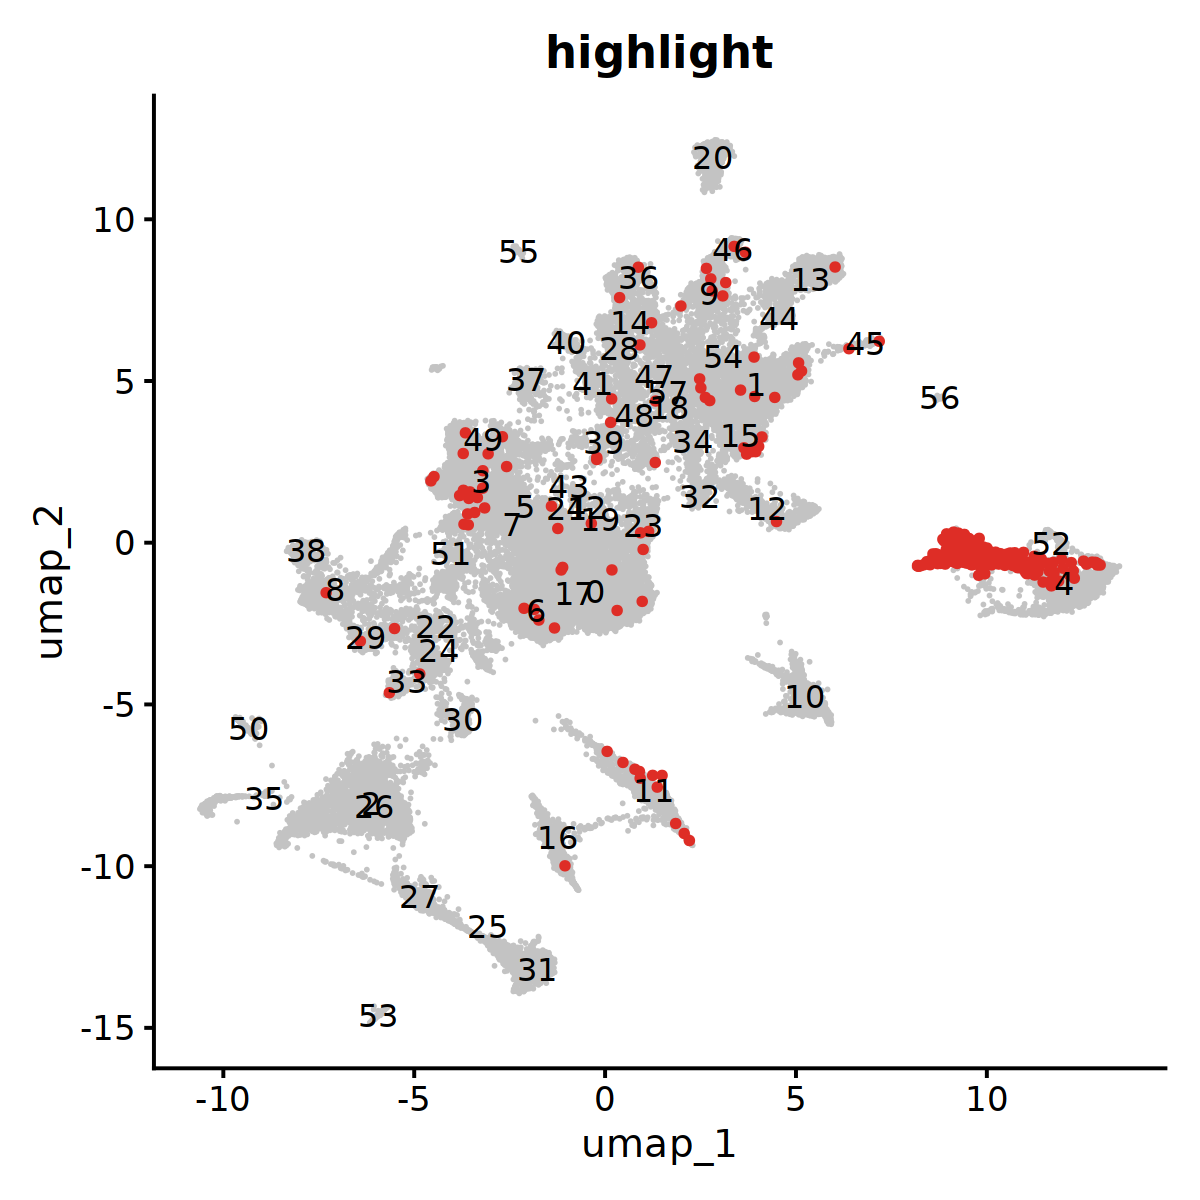

In [140]:
selected_cells = df %>%
filter(gene_count > 20) %>% 
# filter(gene_count < 10) %>%
filter(class == 'neuron') %>%
rownames

selected_cells %>% length


options(repr.plot.width=6, repr.plot.height=6, repr.plot.res=200)
DimPlot(obj, group.by = 'seurat_clusters', label=TRUE, cells.highlight = selected_cells) + NoLegend()

Warning message:
“The `slot` argument of `VlnPlot()` is deprecated as of Seurat 5.0.0.
ℹ Please use the `layer` argument instead.”


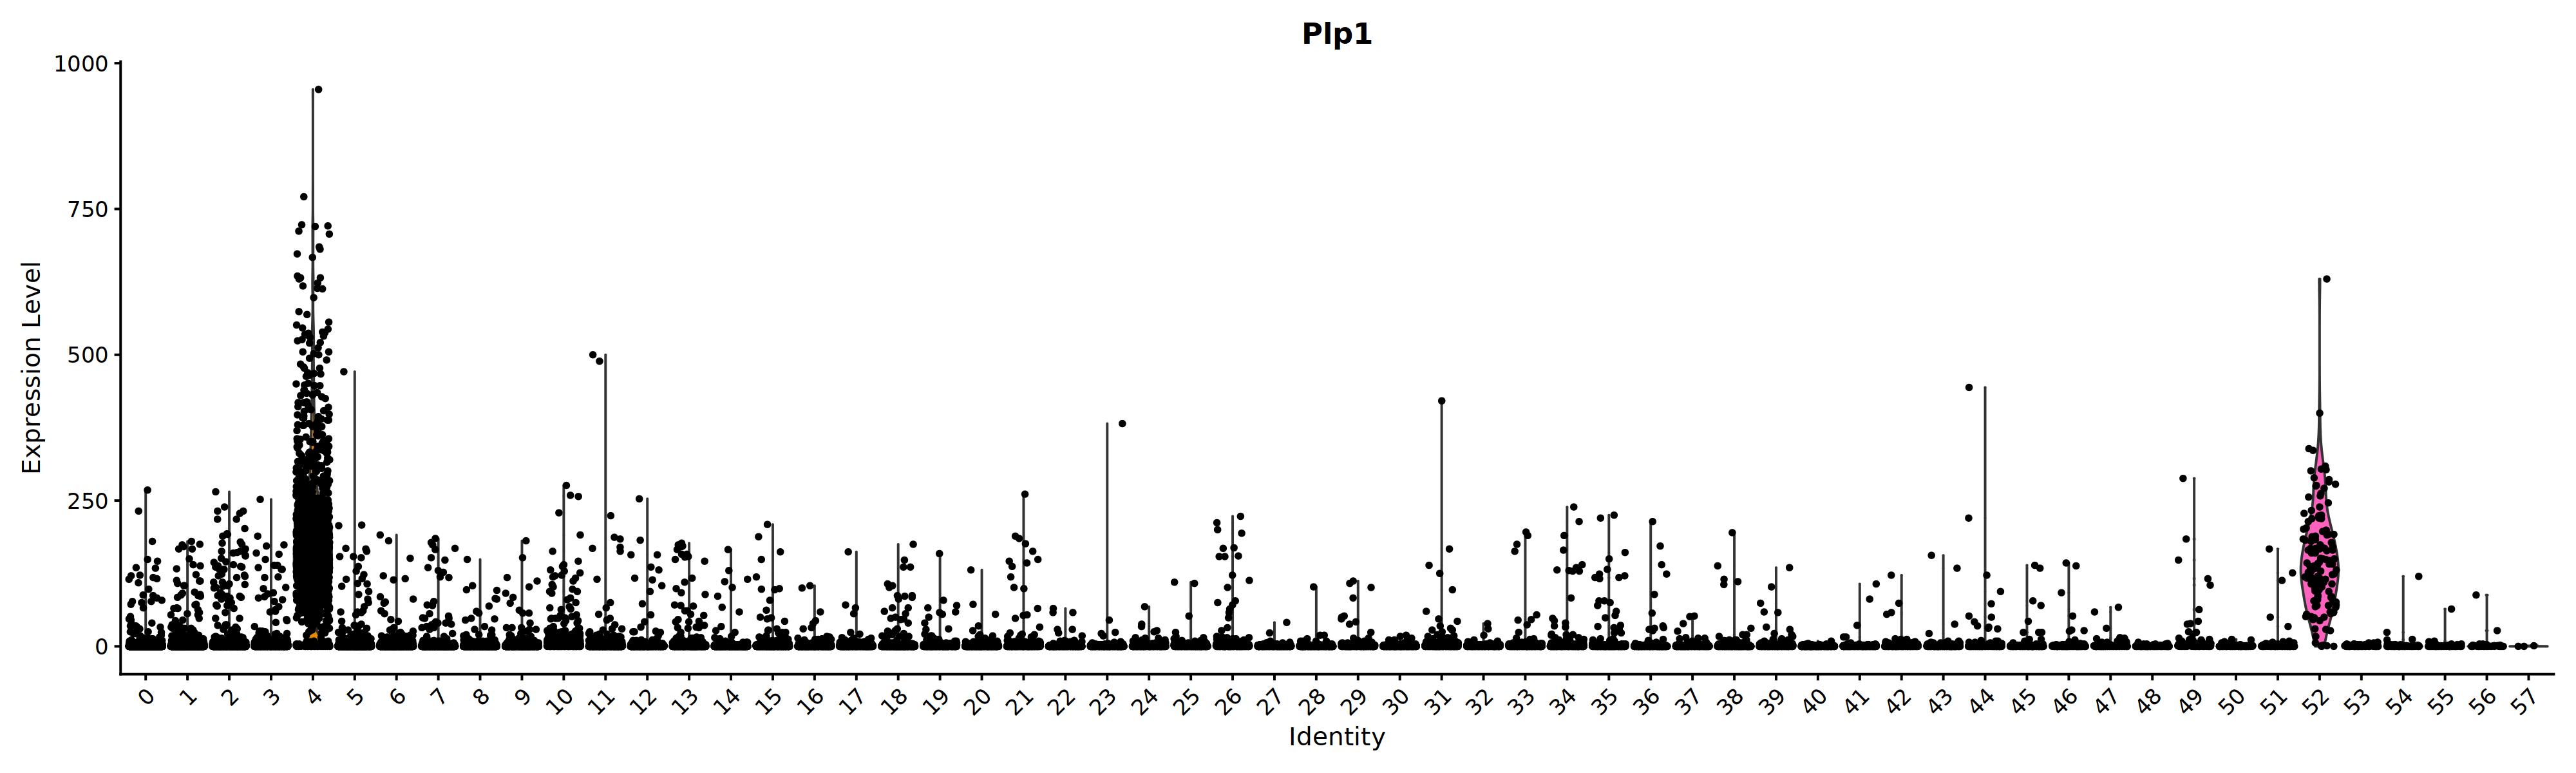

In [78]:
options(repr.plot.width=20, repr.plot.height=6, repr.plot.res=200)
obj %>% VlnPlot(features = 'Plp1', group.by = 'seurat_clusters', slot = 'counts') + NoLegend()

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 35326 rows containing non-finite values (`stat_density()`).”


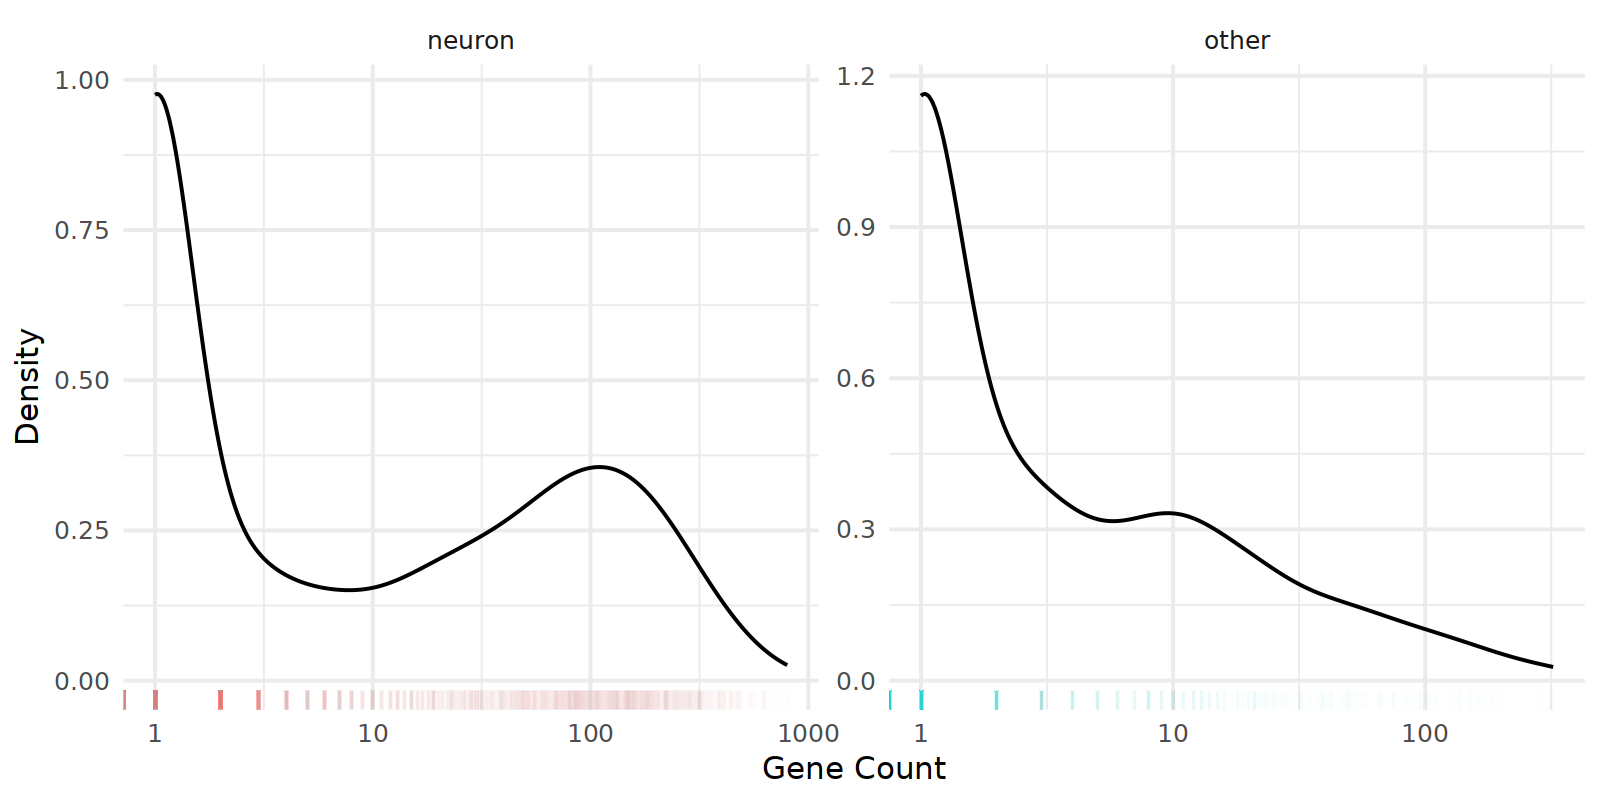

In [150]:
options(repr.plot.width=8, repr.plot.height=4)
library(ggplot2)
library(dplyr)

# Assuming obj is your data and it has been processed correctly
df = obj %>%
  `[[`() %>%
  mutate(gene_count = obj[["Xenium"]]$counts['Agrp', ])

ggplot(df, aes(x = gene_count)) +
  geom_density(alpha = 0.6) +  # Existing density layer
  geom_rug(aes(color = class), sides = "b", alpha=0.01) +  # Adding a rug to indicate the distribution of points
  facet_wrap(~ class, scales = "free") +
  scale_x_log10() +
  theme_minimal() +
  labs(x = "Gene Count", y = "Density") +
  scale_fill_viridis_d() +  # Adjust as needed
  theme(legend.position = "bottom") + NoLegend()


[1] 3

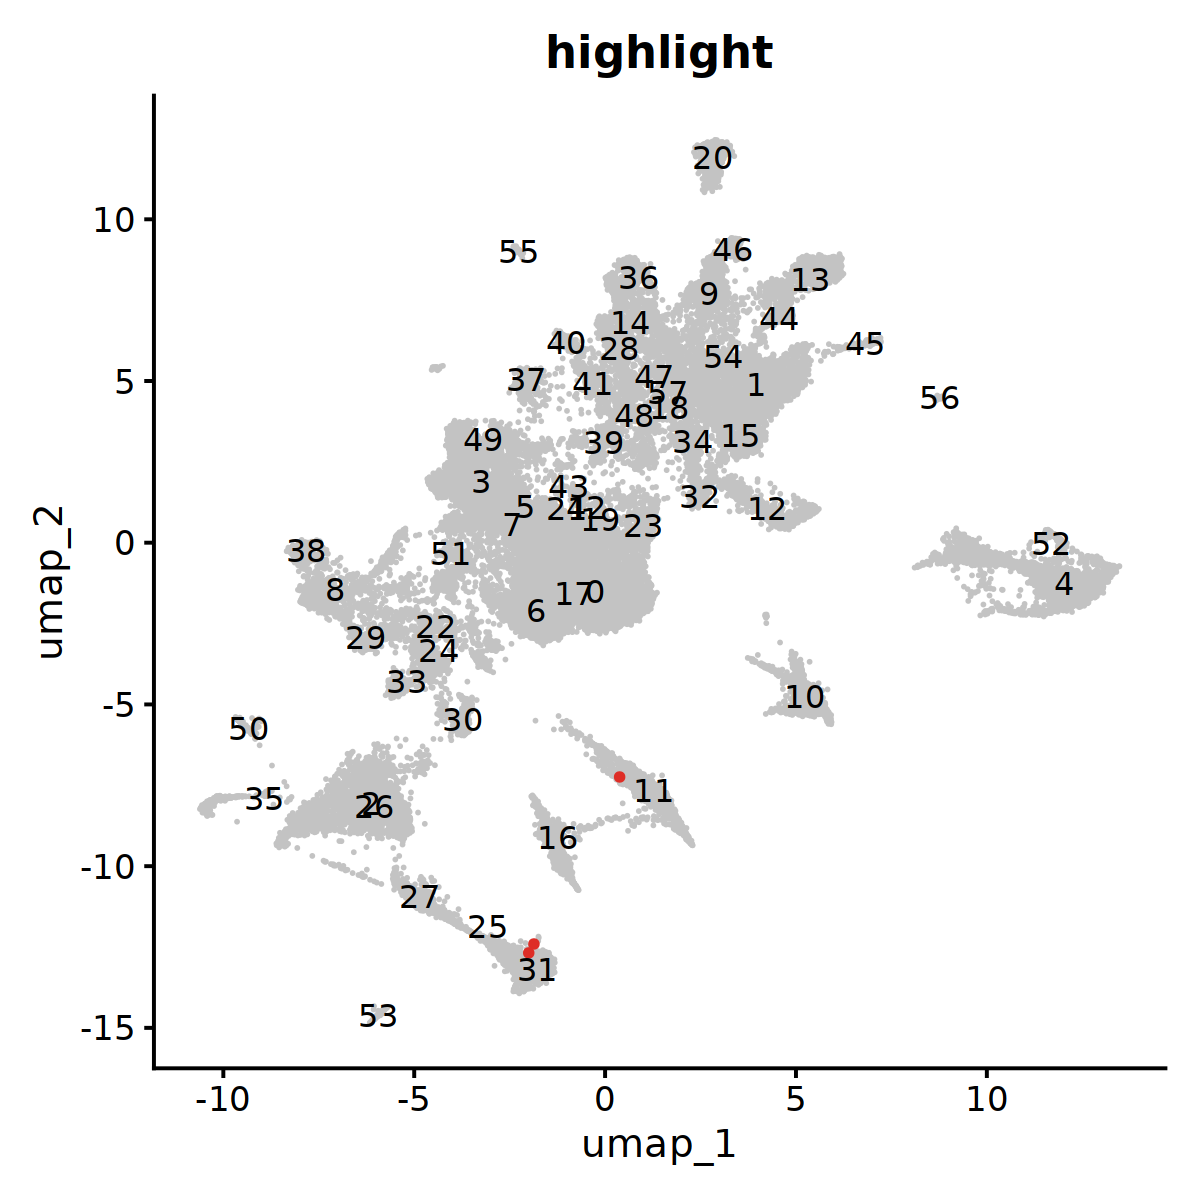

In [175]:
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res=200)

selected_cells = df %>%
filter(gene_count >= 25) %>% 
filter(gene_count <= 25) %>% 
filter(class == 'other') %>%
rownames

selected_cells %>% length

options(repr.plot.width=6, repr.plot.height=6, repr.plot.res=200)
DimPlot(obj, group.by = 'seurat_clusters', label=TRUE, cells.highlight = selected_cells) + NoLegend()

[1] 66

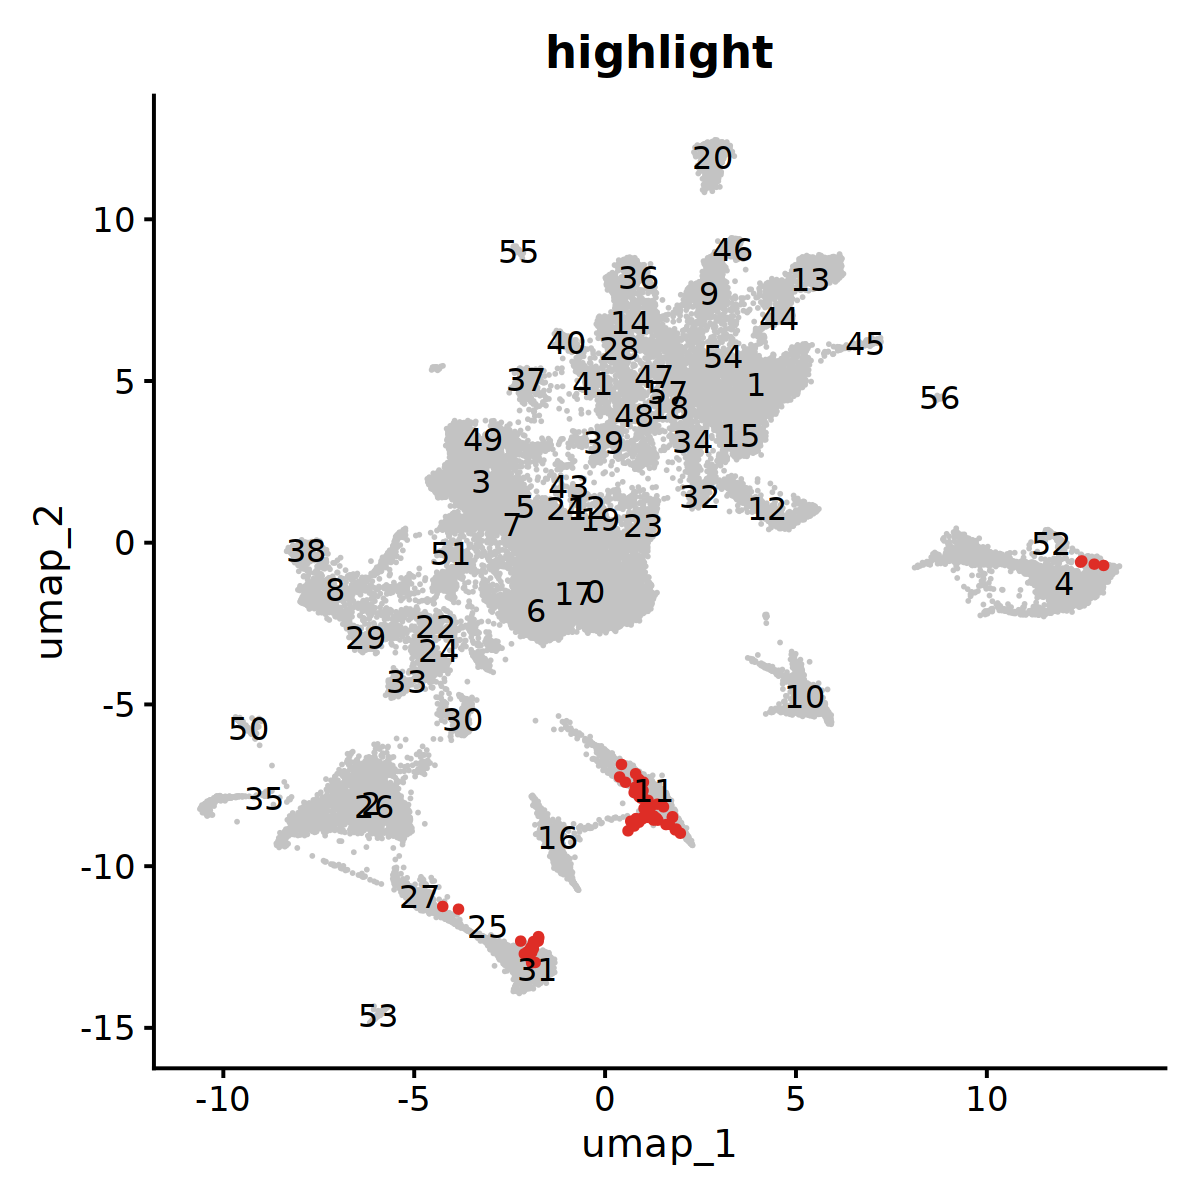

In [170]:
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res=200)

selected_cells = df %>%
filter(gene_count >= 25) %>% 
filter(class == 'other') %>%
rownames

selected_cells %>% length

options(repr.plot.width=6, repr.plot.height=6, repr.plot.res=200)
DimPlot(obj, group.by = 'seurat_clusters', label=TRUE, cells.highlight = selected_cells) + NoLegend()

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 32362 rows containing non-finite values (`stat_density()`).”


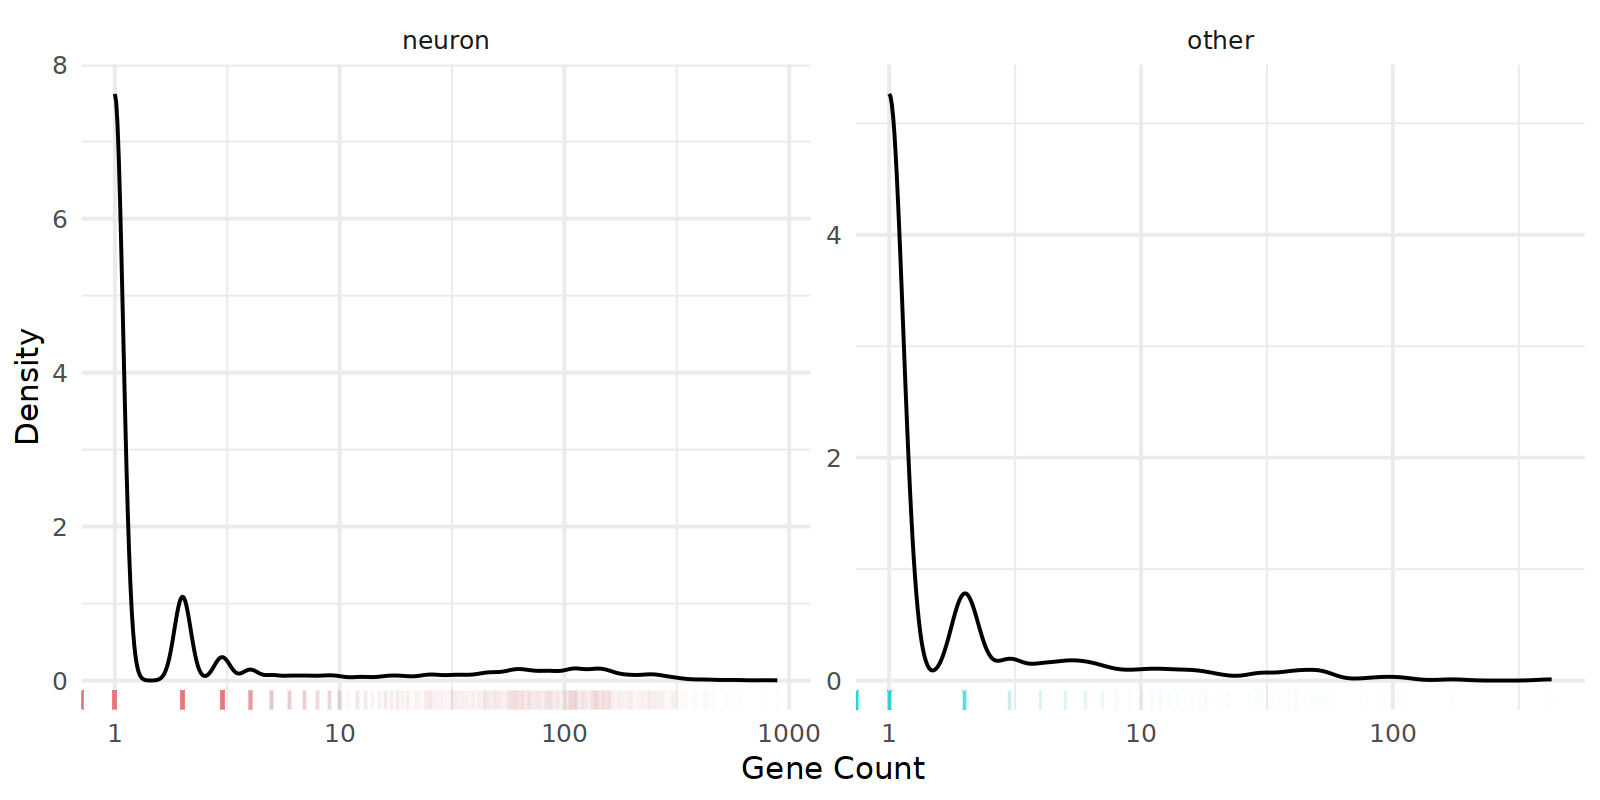

In [179]:
options(repr.plot.width=8, repr.plot.height=4)

library(ggplot2)
library(dplyr)

# Assuming obj is your data and it has been processed correctly
df = obj %>%
  `[[`() %>%
  mutate(gene_count = obj[["Xenium"]]$counts['Pomc', ])

ggplot(df, aes(x = gene_count)) +
  geom_density(alpha = 0.6) +  # Existing density layer
  geom_rug(aes(color = class), sides = "b", alpha=0.01) +  # Adding a rug to indicate the distribution of points
  facet_wrap(~ class, scales = "free") +
  scale_x_log10() +
  theme_minimal() +
  labs(x = "Gene Count", y = "Density") +
  scale_fill_viridis_d() +  # Adjust as needed
  theme(legend.position = "bottom") + NoLegend()


[1] 28

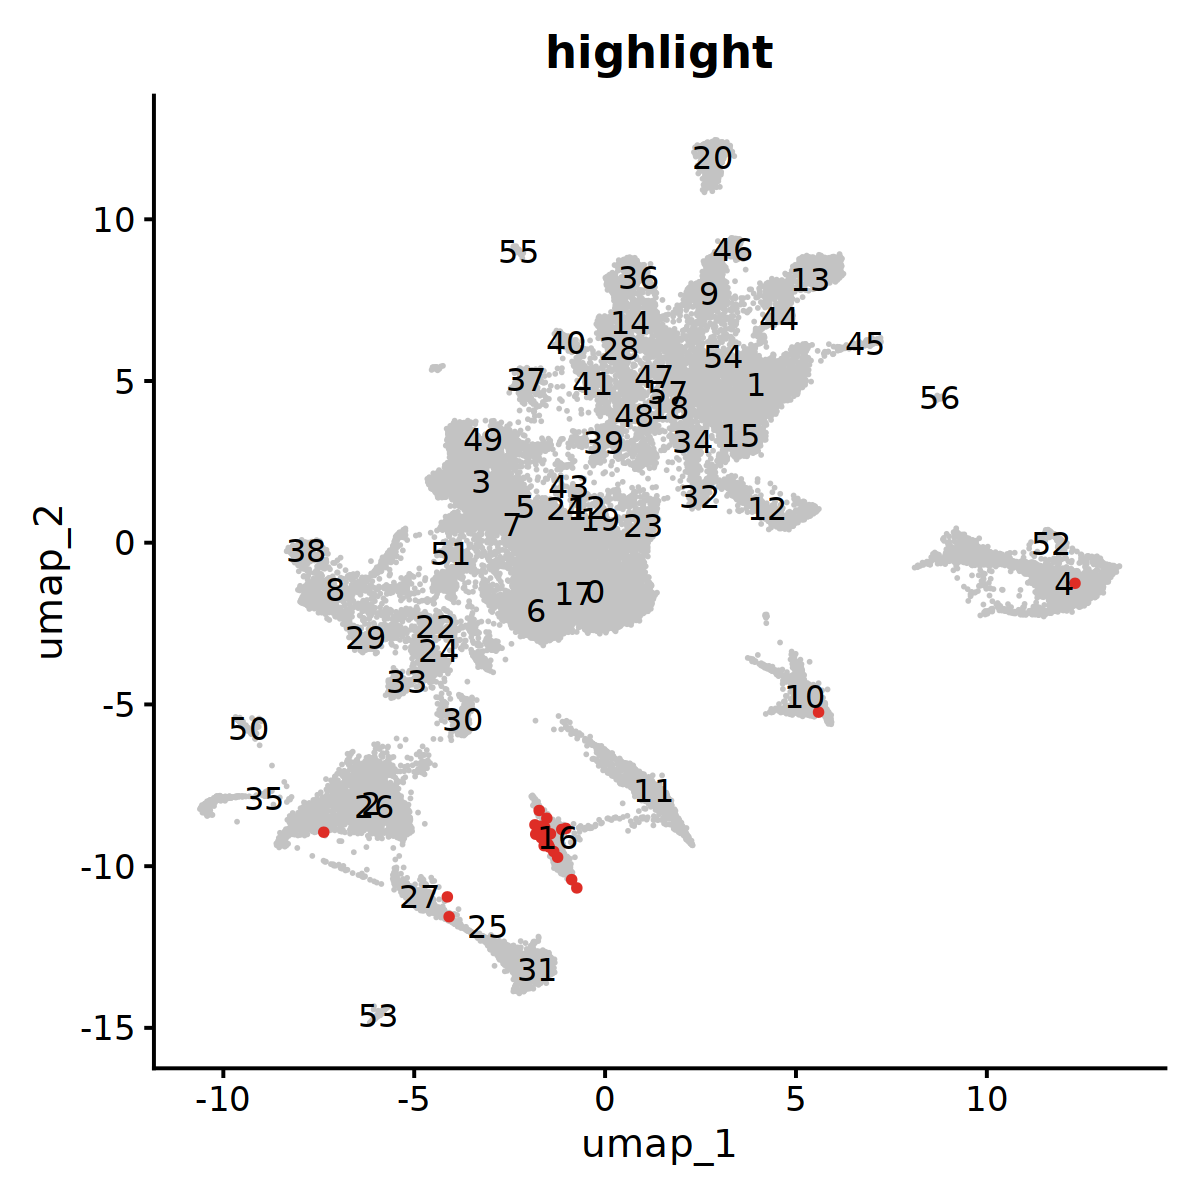

In [184]:
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res=200)

selected_cells = df %>%
filter(gene_count > 25) %>% 
filter(class == 'other') %>%
rownames

selected_cells %>% length

options(repr.plot.width=6, repr.plot.height=6, repr.plot.res=200)
DimPlot(obj, group.by = 'seurat_clusters', label=TRUE, cells.highlight = selected_cells) + NoLegend()

In [176]:
reclass_by_gene_hilo_v02 = function(xe_obj, gene, gene_thr_lo, gene_thr_hi, wrong_class, correct_class){
    meta = xe_obj %>% `[[`
    meta = meta %>%
        mutate(gene_count = xe_obj[["Xenium"]]$counts[gene, ]) %>%
        mutate(cell_class = case_when((gene_count >= gene_thr_hi &
                                      gene_count >= gene_thr_lo &
                                      cell_class == wrong_class) ~ correct_class,
                                      (gene_count <= gene_thr_hi &
                                      gene_count >= gene_thr_lo &
                                      cell_class == wrong_class) ~ 'blah',
                                      TRUE ~ cell_class)) %>%
        select(-gene_count)
    xe_obj@meta.data = meta
    xe_obj
}

In [191]:
obj = obj %>%
AddMetaData(obj %>%
           `[[` %>%
            mutate(cell_class = class))

ERROR: Error in parse(text = x, srcfile = src): <text>:5:70: unexpected ')'
4:             mutate(cell_class = class) %>%
5:             mutate(polar_label = paste0(labels, '.', fgf1_grouping))))
                                                                        ^


In [185]:
obj %>% reclass_by_gene_hilo_v02('Plp1', 20, 20, 'neuron', 'other') %>%
        reclass_by_gene_hilo_v02('Agrp', 25, 25, 'other', 'neuron') %>%
        reclass_by_gene_hilo_v02('Pomc', 25, 25, 'other', 'neuron') %>%
`[[` %>% filter(cell_class == 'blah')

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


orig.ident,nCount_Xenium,nFeature_Xenium,nCount_BlankCodeword,nFeature_BlankCodeword,nCount_ControlCodeword,nFeature_ControlCodeword,nCount_ControlProbe,nFeature_ControlProbe,cell_area,⋯,elongation,avg_confidence,nucleus_area,sample_name,treatment,strain,time,seurat_clusters,class,cell_class
<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>


In [186]:
obj %>% reclass_by_gene_hilo_v02('Plp1', 20, 20, 'neuron', 'other') %>%
        reclass_by_gene_hilo_v02('Agrp', 25, 25, 'other', 'neuron') %>%
        reclass_by_gene_hilo_v02('Pomc', 25, 25, 'other', 'neuron') %>%
`[[` %>% group_by(cell_class) %>% summarise(n=n())

cell_class,n
<chr>,<int>
neuron,31047
other,7473


In [187]:
obj %>% #reclass_by_gene_hilo('Plp1', 20, 20, 'neuron', 'other') %>%
`[[` %>% group_by(cell_class) %>% summarise(n=n())

cell_class,n
<fct>,<int>
neuron,31545
other,6975


In [193]:
add_cell_class_and_polar_label = function(obj_fgf1){
    meta = obj_fgf1 %>%
        `[[` %>% 
        mutate(cell_class = class) %>%
        mutate(polar_label = paste0(labels, '.', fgf1_grouping))
    obj_fgf1 = obj_fgf1 %>% AddMetaData(meta)
    obj_fgf1
}

In [195]:
obj_fgf1 = obj_fgf1 %>% add_cell_class_and_polar_label

In [196]:
obj_fgf1 %>% `[[`

,orig.ident,nCount_RNA,nFeature_RNA,nCount_RNA_SCOP,nFeature_RNA_SCOP,Index.10x_SCOP,nCount_HTO_SCOP,nFeature_HTO_SCOP,Index.HTO_SCOP,nCount_spliced_SCOP,⋯,labels_chunk,restored_grouping,bl6_grouping,fgf1_grouping,labels,hash.mcl.ID,orig.batch,group,cell_class,polar_label
,<chr>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
SI-TT-A11_AAACCCACATACAGCT,SI-TT-A11,6796,3192,22352,4816,SI-TT-A11,1000,12,D706,2976,⋯,n0,none,none,none,Nfix__Nfib,M8,Batch 1,Veh_PF.Day5.obob,neuron,Nfix__Nfib.none
SI-TT-A11_AAACCCATCCAAGCAT,SI-TT-A11,6044,3023,21805,4803,SI-TT-A11,2167,12,D706,3573,⋯,n6,none,none,none,Sim1,N7,Batch 1,FGF1.Day5.obob,neuron,Sim1.none
SI-TT-A11_AAACCCATCCCATAAG,SI-TT-A11,13238,4512,37468,5802,SI-TT-A11,1790,12,D706,5281,⋯,n4,none,none,none,Fez1,N8,Batch 1,Veh_PF.Day5.obob,neuron,Fez1.none
SI-TT-A11_AAACGCTCATCTATCT,SI-TT-A11,17081,5220,43140,6463,SI-TT-A11,1507,12,D706,6252,⋯,n4,none,none,none,Fez1,N8,Batch 1,Veh_PF.Day5.obob,neuron,Fez1.none
SI-TT-A11_AAACGCTGTTCGGTAT,SI-TT-A11,8448,3617,27828,5392,SI-TT-A11,1260,12,D706,3881,⋯,n0,neg_FGF1,none,neg,Htr3b,N8,Batch 1,Veh_PF.Day5.obob,neuron,Htr3b.neg
SI-TT-A11_AAAGAACCATGACTTG,SI-TT-A11,7713,3575,35327,5792,SI-TT-A11,1881,12,D706,4901,⋯,n4,none,none,none,Lepr67,M8,Batch 1,Veh_PF.Day5.obob,neuron,Lepr67.none
SI-TT-A11_AAAGAACGTCGCATGC,SI-TT-A11,2995,1817,6691,2828,SI-TT-A11,567,12,D706,1261,⋯,n4,none,none,none,Lepr89,N7,Batch 1,FGF1.Day5.obob,neuron,Lepr89.none
SI-TT-A11_AAAGGATAGCTTCATG,SI-TT-A11,4603,2562,15929,4233,SI-TT-A11,907,12,D706,2217,⋯,n0,none,none,none,Arx__Nr5a2,M8,Batch 1,Veh_PF.Day5.obob,neuron,Arx__Nr5a2.none
SI-TT-A11_AAAGGATAGGATAATC,SI-TT-A11,6575,3197,26312,5134,SI-TT-A11,1904,12,D706,3882,⋯,n4,none,none,none,Lepr67,N7,Batch 1,FGF1.Day5.obob,neuron,Lepr67.none


In [ ]:
VlnPlot(features = c('Fgf13', 'Nrxn3', 'Galntl6', 'Dlg2'), group.by = 'predicted.label') + theme(legend.position = "none")

In [57]:
df %>%
filter(gene_count > 10) %>% 
filter(class == 'neuron') %>%
group_by(seurat_clusters) %>% summarize(n=n()) %>% arrange(desc(n))

seurat_clusters,n
<fct>,<int>
1,78
3,69
0,58
5,56
13,43
6,39
11,35
7,34
18,33


In [ ]:
DefaultAssay(obj) = 'Xenium'
selected_cells = obj %>% `[[` %>% filter(class == 'neuron') %>% rownames
obj = obj %>% subset(cells = selected_cells)

In [ ]:
DefaultAssay(obj) = 'Xenium'

In [ ]:
obj

In [ ]:
# obj[["Xenium"]] <- split(obj[["Xenium"]], f = obj$sample_name)

DefaultAssay(obj) = 'Xenium'

obj = obj %>% JoinLayers

obj <- NormalizeData(obj)
VariableFeatures(obj) = xenium_genes
obj <- ScaleData(obj, features = xenium_genes)
obj <- RunPCA(obj, features = xenium_genes, npcs = 80)
obj <- FindNeighbors(obj, dims = 1:80)
obj <- FindClusters(obj, resolution = 2, cluster.name = "unintegrated_clusters")

In [ ]:
obj <- obj %>% 
    RunUMAP(assay='Xenium', slot='counts', features = xenium_genes, reduction.name = "umap.unintegrated", return.model=TRUE)



In [ ]:
obj

In [ ]:
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res=300)
DimPlot(obj, reduction = 'umap', group.by = 'seurat_clusters', label=TRUE) + NoLegend()

In [ ]:
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res=300)
DimPlot(obj, reduction = 'umap', group.by = 'sample_name', label=TRUE) + NoLegend()

In [ ]:
transfer_data_cca_00 = function(xe_obj, obj_fgf1, refdata_column){
    xenium_genes = get_xe_genes_v02(xe_obj, obj_fgf1)
    xenium_genes_all = get_xe_genes_all_v02(xe_obj)
    obj_fgf1 = obj_fgf1 %>% Seurat::RunUMAP(assay='RNA', slot='counts', features = xenium_genes, return.model = TRUE)
    refdata = obj_fgf1 %>% `[[` %>% pull(refdata_column)
    anch = FindTransferAnchors(reference = obj_fgf1, query = xe_obj, features = xenium_genes,  
                               normalization.method = 'LogNormalize',
                               reduction = 'cca',
                               query.assay = 'Xenium',
                               reference.assay = 'integrated',
                               recompute.residuals = T,
                               verbose=TRUE)
    predictions <- TransferData(anchorset = anch, refdata = refdata, weight.reduction='cca') %>% 
        dplyr::select(predicted.id, prediction.score.max)
    predictions[[refdata_column]] = predictions$predicted.id
    predictions[[paste0(refdata_column, '_prediction.score.max')]] = predictions$prediction.score.max
    predictions = predictions %>% select(-predicted.id, -prediction.score.max)
    xe_obj <- AddMetaData(xe_obj, metadata = predictions)
    Misc(object = xe_obj, slot = paste0("predictions_", refdata_column)) <- predictions
    xe_obj
}

In [ ]:
obj_fgf1 = obj_fgf1 %>%
AddMetaData(obj_fgf1 %>% `[[` %>% mutate(polar_label = paste0(labels, '.', fgf1_grouping)))

In [ ]:
tobj = transfer_data_cca_00(obj, obj_fgf1, 'polar_label')

In [ ]:
tobj %>% `[[` %>% head

In [ ]:
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res=300)
DimPlot(tobj, reduction = 'umap.unintegrated', group.by = 'polar_label', label=TRUE) + NoLegend()

In [ ]:
disp_feats = c("Agrp", "Pomc", "Rax", "Aqp4", "Bmp4", 
               "Cfap299", "Cntn4", "Cntn5", "Grm8", "Hs3st4", 
               "Kcnip4", "Pdgfra", "Pdzrn3", "Plp1",  
    "Rbfox1", "Slc1a2", "Slc7a11", "Tenm2", "Htr3b", "Zfp804b")

In [ ]:
options(repr.plot.width=15, repr.plot.height=12, repr.plot.res=300)
FeaturePlot(tobj, ncol = 5, order=F, reduction = 'umap.unintegrated',
            features = disp_feats
)

In [ ]:
options(repr.plot.width=15, repr.plot.height=12, repr.plot.res=300)
FeaturePlot(tobj, ncol = 5, order=T, reduction = 'umap.unintegrated',
            features = disp_feats
)

In [ ]:
options(repr.plot.width=18, repr.plot.height=6, repr.plot.res=300)
agrp_cells = tobj %>% `[[` %>% filter(str_detect(polar_label,'Agrp')) %>% rownames
FeaturePlot(tobj, ncol = 3, order=F, reduction = 'umap.unintegrated', cells = agrp_cells,
            features = c('Agrp', 'Cntn4', 'Cntn5')
)

In [ ]:
options(repr.plot.width=12, repr.plot.height=6, repr.plot.res=300)
agrp_cells = tobj %>% `[[` %>% filter(labels == 'Agrp') %>% rownames
FeaturePlot(tobj, slot = 'counts', ncol = 2, order=T, reduction = 'umap.unintegrated', cells = agrp_cells,
            features = c('Agrp', 'Cntn4')
)

In [ ]:
tobj %>% subset(cells = agrp_cells) %>% VlnPlot(features = c('Agrp', 'Cntn4', 'Cntn5'), group.by = 'treatment', pt.size=0)

In [ ]:
tobj %>%
`[[` %>%
rowwise %>%
mutate(labels = str_split(polar_label, '\\.') %>% unlist %>% `[[`(1)) %>%
mutate(polarity = str_split(polar_label, '\\.') %>% unlist %>% `[[`(2)) %>%
ungroup %>%
group_by(labels, polarity) %>%
summarise(n=n())

In [ ]:
tobj %>% subset(cells = agrp_cells) %>% VlnPlot(features = c('Agrp', 'Cntn4', 'Cntn5'), group.by = 'polar_label', pt.size=0.2)

In [ ]:
obj_fgf1 %>% `[[`